# GRIP-The Sparks Foundation: Data Science and business Analytics


## Task 1 : Prediction using supervised ML


#### Author : Lansari Manel

##### <i>Task Goal - To predict percentage of an student based of study hours<i>


<i>****Step 1: Import Libraries****<i>

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#reading the data set
data = pd.read_csv('http://bit.ly/w-data')

**Step 2 : Analys Dataset**

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info() ##check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Step 3: Visualisation Data**

In [8]:
data.columns #Visualization the data

Index(['Hours', 'Scores'], dtype='object')

In [11]:
data.shape #25 Lines 2 columns 

(25, 2)

In [17]:
print('La moyenne:',data['Hours'].mean())
print('La variance :',data['Hours'].var())
print('La variance :',data['Hours'].std())

La moyenne: 5.012
La variance : 6.3761
La variance : 2.5250940576540906


<AxesSubplot:>

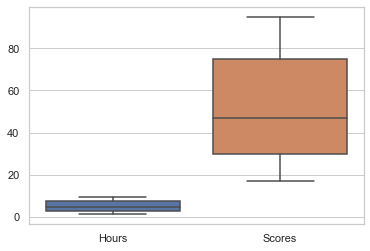

In [24]:
sns.set(style='whitegrid')
sns.boxplot(data=data,orient='v') # 

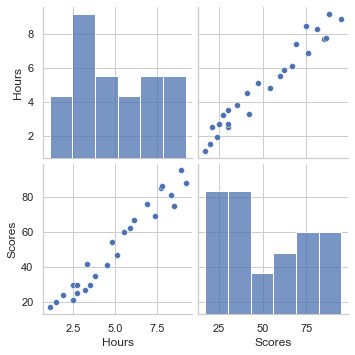

In [25]:
sns.pairplot(data)

<AxesSubplot:>

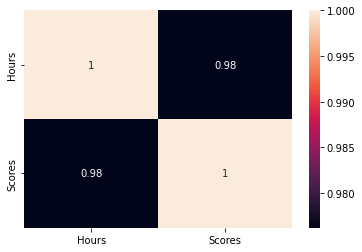

In [9]:
sns.heatmap(data.corr(), annot=True)

In [26]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


***Step 4:Training the Data***

In [31]:
print(data.dtypes) # hours type float and scores type int 

Hours     float64
Scores      int64
dtype: object


In [32]:
x = np.asanyarray(data['Hours'])#Convert a list into an array:
y = np.asanyarray(data['Scores']) 

In [33]:
#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)
#random state =0  get  30% lines for training and get the rest for testing

In [36]:
linearRegression = LinearRegression() # create object 

In [40]:
linearRegression.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [53]:
print('Coefficients: ', linearRegression.coef_)
print("Intercept: ", linearRegression.intercept_)

Coefficients:  [[9.78856669]]
Intercept:  [2.37081538]


**Step  5: Comparing Data(Actual vs Predicted)**

#### Plotting The Regression Line

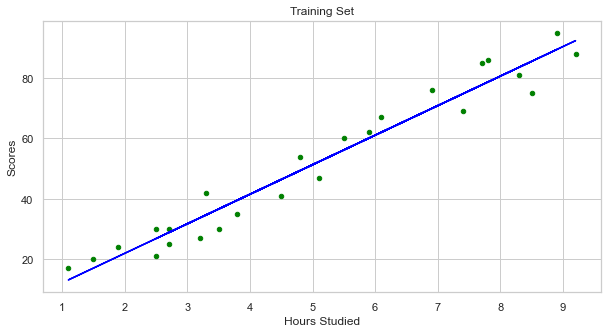

In [55]:
#plotting the traing set
data.plot(kind='scatter', x='Hours', y='Scores', figsize=(10,5), color='green')
plt.plot(x_train, linearRegression.coef_[0]*x_train + linearRegression.intercept_, color='blue')
plt.title('Training Set')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [56]:
predict=linearRegression.predict(np.array(x_test).reshape(-1,1))
predict

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [57]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y_test, predict)
print("Validation MAE for best value : {:,.0f}".format(val_mae))

Validation MAE for best value : 4


In [58]:
for i in range(8):
    print([y_test[i],predict[i]])

[20, array([17.05366541])]
[27, array([33.69422878])]
[69, array([74.80620886])]
[30, array([26.8422321])]
[62, array([60.12335883])]
[35, array([39.56736879])]
[24, array([20.96909209])]
[86, array([78.72163554])]


In [62]:
df = pd.DataFrame(np.c_[x_test,y_test,predict], columns=['Hours', 'Actual Score', 'Scores Predict'])
df

,Hours,Actual Score,Scores Predict
0,1.5,20.0,17.053665
1,3.2,27.0,33.694229
2,7.4,69.0,74.806209
3,2.5,30.0,26.842232
4,5.9,62.0,60.123359
5,3.8,35.0,39.567369
6,1.9,24.0,20.969092
7,7.8,86.0,78.721636


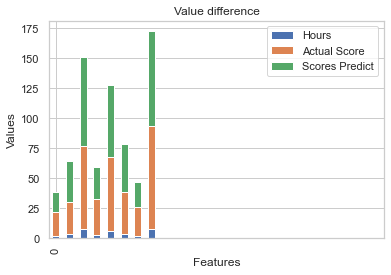

In [78]:
df.plot(kind='bar' , stacked = True)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Value difference')
plt.xticks([0,24])
plt.show()

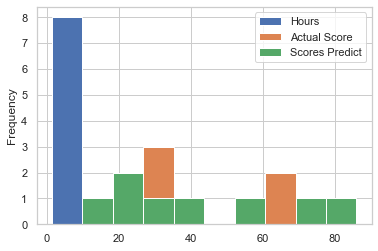

In [80]:
df.plot(kind='hist')
plt.show()

In [66]:
#testing with given data
hours= [10.25]
predection=linearRegression.predict([hours])
print("Number of Hours = {}".format(hours))
print("Predicted scores = {}".format(predection[0]))

Number of Hours = [10.25]
Predicted scores = [102.70362392]


In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict)) # prediction y_pred 
print(f'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R2:', metrics.r2_score(y_test, predict)) # prediction y_pred 
#sstot  Total Sum of Squares.
#ssrest moyenne des residues

MAE: 4.419727808027652
MSE: 22.96509721270043
RMSE: 4.792191274636315
R2: 0.9568211104435257


##  <i> Conclusion:

**If the student studies 10.25 hours per day,the score may be 102.70362392 **

                                                      ##Lansari Manel##
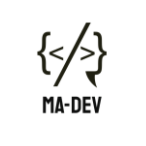